In [21]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt 
import matplotlib 
from pylab import *
import numpy as np 
import random

%matplotlib inline

In [22]:
# Número de pares atributos (x) e labels (y)
M = 10000

In [23]:
# Valores de entradas exemplos, features ou atrubutos
np.random.seed(1234)
x1 = 10.0*np.random.randn(M,1)

x2 = 10.0*np.random.randn(M,1)

# Valores de saída labels
y = 2.0*x1 + 2.0*x2 + 10.0*np.random.randn(M,1)


In [24]:
# Gerando valores para os parâmetros
N = 200 
a1 = np.linspace(-30.0, 34.0, N)
a2 = np.linspace(-30.0, 34.0, N)
A1, A2 = np.meshgrid(a1, a2) 

In [25]:
# Gerando os ponto para plotar a superfície de erro 
J = np.zeros((N,N))
for iter1 in range(0,N):
    for iter2 in range(0,N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum(np.square(y-yhat))

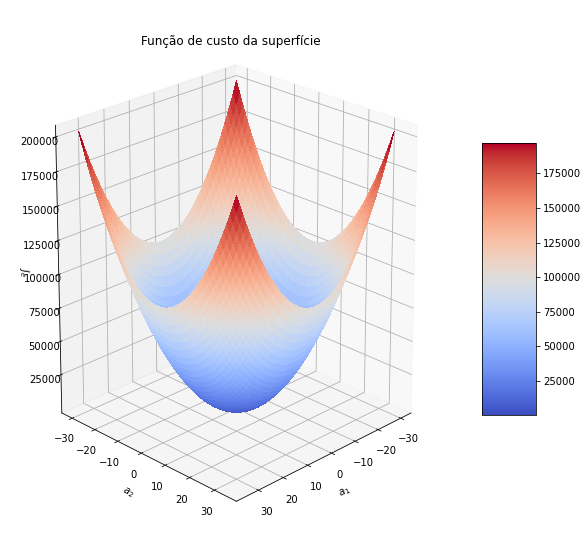

In [26]:
# Plotandoa a superfície de erro 
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased = False)

fig.colorbar(surf, shrink=0.5, aspect =5)

ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$')

plt.title('Função de custo da superfície')
ax.view_init(20,45)



In [27]:
X = np.block([x1,x2])
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0,0]*x1 + a_opt[1,0]*x2
Joptimum = (1/M)*np.sum(np.power((y-yhat),2))


In [28]:
# implementação odo gradiente descedente
maxNumIter = 10000

alpha = 0.001

a = np.zeros((2,maxNumIter))
Jgd = np.zeros(maxNumIter)

a[0,0] = -30
a[1,0] = -30

yhat = a[0,0]*x1 + a[1,0]*x2

Jgd[0] =    (1/M)*np.sum(np.power((y-yhat),2))

error = 1
iter = 0

while(error>0.001 and iter<maxNumIter):
    yhat = a[0, iter]*x1 + a[1, iter]*x2
    update =    -(2/M)*np.transpose((y-yhat)).dot(X)
    a_aux = a[:,iter] - alpha*np.transpose(update)
    a[0,iter+1] = a_aux[0,0]
    a[1,iter+1] = a_aux[1,0]
    yhat = a[0,iter+1]*x1 + a[1,iter+1]*x2
    Jgd[iter+1] = (1/M)*sum(np.power(y-yhat,2))
    error = np.abs(Jgd[iter]-Jgd[iter+1])
    iter =iter+1




(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)
(2,)


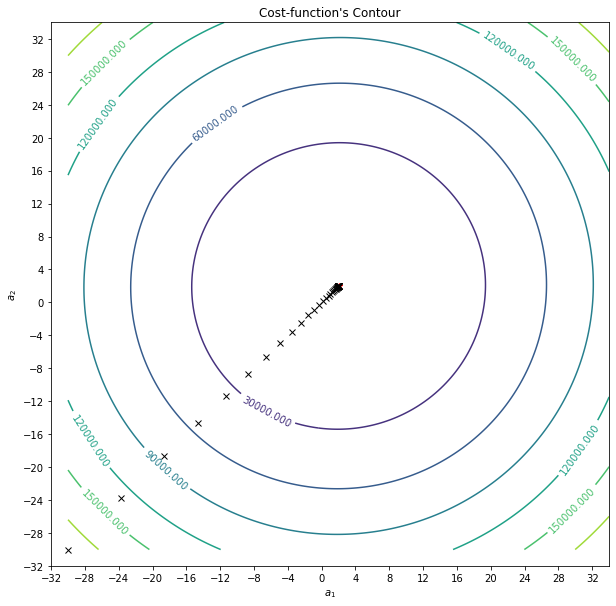

In [29]:
fig = plt.figure(figsize=(10,10))

cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$')
plt.ylabel('$a_2$')
plt.title('Cost-function\'s Contour')

plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a[0, 0:iter], a[1, 0:iter], 'kx')

plt.xticks(np.arange(-32, 34, step=4.0))
plt.yticks(np.arange(-32, 34, step=4.0))
plt.show()

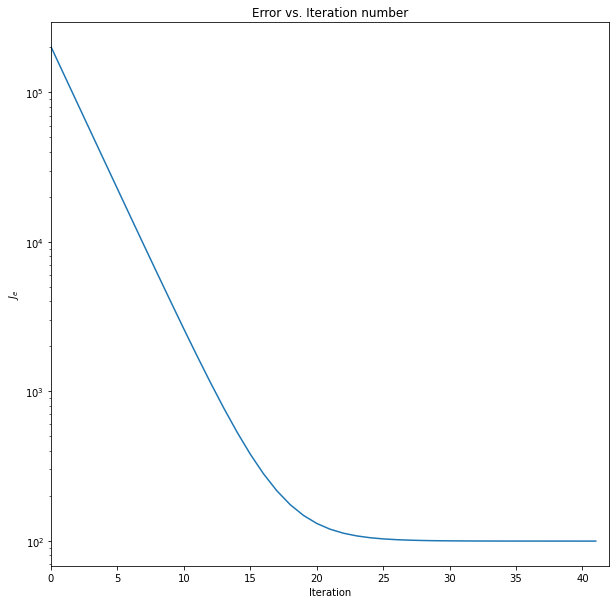

In [30]:
fig = plt.figure(figsize=(10,10))

plt.plot(np.arange(0, iter), Jgd[0:iter])
plt.xlim((0, iter))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()